# **Imports**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **Data** **Exploration**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')

In [ ]:
data.shape

(918, 12)

In [ ]:
#default is first 5 rows
#data.head()
data.head(10)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
5              N      0.0       Up             0  
6              N      0.0       Up             0  
7              N      0.0       Up             0  
8              Y      1.5     Flat             1  
9              N      0.0       Up             0

In [ ]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#selects columns from the Data that have the data type object and stores the names of these columns in the string_col variable.
string_col = data.select_dtypes(include="object").columns
# converts the selected columns to the string data type
#to provide additional string-specific functionality compared to the generic object data type.
data[string_col]=data[string_col].astype("string")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [ ]:
#provides a summary of the numerical columns
data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [ ]:
string_col=data.select_dtypes("string").columns.to_list()

# **Data** **Visualization**

<ipython-input-12-99be289a4ff4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")


<Axes: >

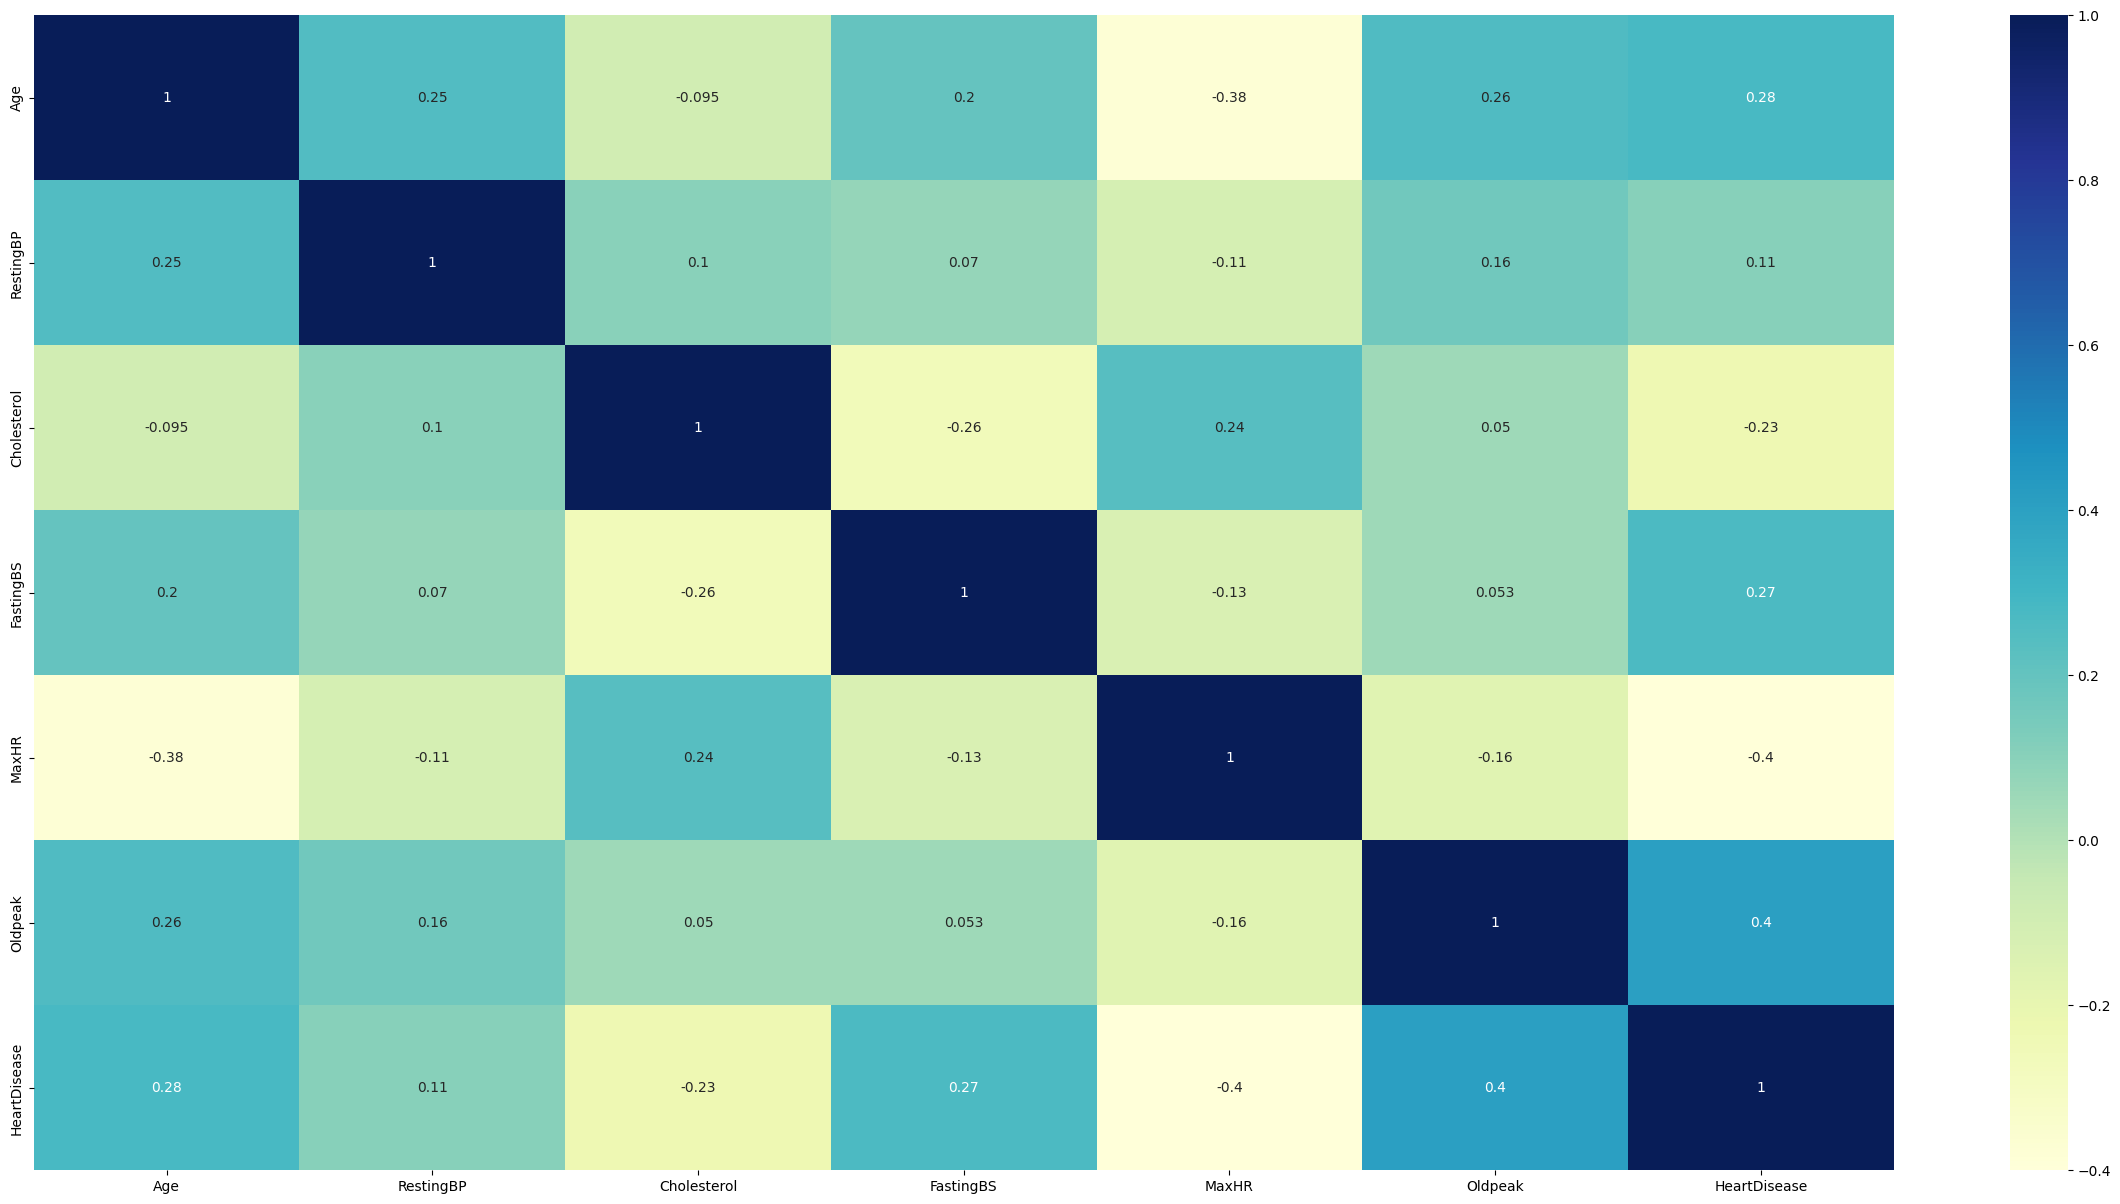

In [ ]:
#heat map to visualize the correlations between the numerical colomns
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [ ]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(data,
                 x="HeartDisease",
                 color="Sex",
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

# **Data** **Pre** **-** **Processing**

In [ ]:
'''in case if we have null values
from sklearn.impute import SimpleImputer
missing values is represented by np.nan and the startegy to fill those values is mean which specifies that the mean of the non-missing values will be used to fill in the missing values.
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
calculates the mean of the non-missing values in the 'Oldpeak' column.
imputer = imputer.fit(data[['Oldpeak']])
data['Oldpeak'] = imputer.transform(data[['Oldpeak']])'''

In [ ]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

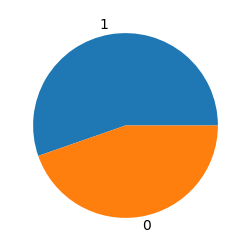

In [ ]:
plt.figure(figsize=(3,3))
#count the occurrences of each unique value in the 'HeartDisease' column of the DataFrame data and store the counts in the Class_type variable.
Class_type=data.value_counts(data['HeartDisease'],sort=True)
Class_type.plot(kind='pie')
plt.show()

In [ ]:
#prefered in nontree based algorithms
#for tree based we can use label Encoder
#drop_first= false ensures that all categories are encoded
data_C=pd.get_dummies(data,columns=string_col,drop_first=False)
data_C.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0      0      1                  0  ...                  0                 0   
1      1      0                  0  ...                  1                 0   
2      0      1                  0  ...                  0                 0   
3      1      0                  1  ...                  0                 0   
4      0      1                  0  ...                  1                 0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0               0                  1              0                 1   
1               0                  1              0                 1   
2               0                  0              1                 1   
3               0                  1              0                 0   
4               0                  1              0                 1   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0                 0              0              0            1  
1                 0              0              1            0  
2                 0              0              0            1  
3                 1              0              1            0  
4                 0              0              0            1  

[5 rows x 21 columns]

In [ ]:
# the columns added to the end so we want to get the target column at the end
# we will drop it, then concatenate it back
target="HeartDisease"
# inplace=True parameter modifies the data_C DataFrame in place meaning the column is dropped from data_C directly and the DataFrame is updated.
data_C.drop(target,axis=1,inplace=True)
data_C=pd.concat([data_C,data[target]],axis=1)
data_C.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
0   40        140          289          0    172      0.0      0      1   
1   49        160          180          0    156      1.0      1      0   
2   37        130          283          0     98      0.0      0      1   
3   48        138          214          0    108      1.5      1      0   
4   54        150          195          0    122      0.0      0      1   

   ChestPainType_ASY  ChestPainType_ATA  ...  ChestPainType_TA  \
0                  0                  1  ...                 0   
1                  0                  0  ...                 0   
2                  0                  1  ...                 0   
3                  1                  0  ...                 0   
4                  0                  0  ...                 0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0               0                  1              0                 1   
1               0                  1              0                 1   
2               0                  0              1                 1   
3               0                  1              0                 0   
4               0                  1              0                 1   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  HeartDisease  
0                 0              0              0            1             0  
1                 0              0              1            0             1  
2                 0              0              0            1             0  
3                 1              0              1            0             1  
4                 0              0              0            1             0  

[5 rows x 21 columns]

In [ ]:
X=data_C.drop(['HeartDisease'],axis=1)
y=data_C['HeartDisease']

In [ ]:
#if the data is not sampled
#from imblearn.under_sampling import RandomUnderSampler
#Sampler=RandomUnderSampler(random_state=1)
from imblearn.over_sampling import RandomOverSampler
Sampler=RandomOverSampler(random_state=1)
X,y=Sampler.fit_resample(X,y)

In [ ]:
from collections import Counter
Counter(y)

Counter({0: 508, 1: 508})

In [ ]:
#make the data ranges from 0 to 1 for better accuracy
# after using the min-max scaler, There are no exist of negative numbers which leads to better performance of the model to train data.
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
X=Scaler.fit_transform(X)
X

array([[0.24489796, 0.7       , 0.47927032, ..., 0.        , 0.        ,
        1.        ],
       [0.42857143, 0.8       , 0.29850746, ..., 0.        , 1.        ,
        0.        ],
       [0.18367347, 0.65      , 0.46932007, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.44897959, 0.6       , 0.40464345, ..., 0.        , 0.        ,
        1.        ],
       [0.46938776, 0.66      , 0.37645108, ..., 0.        , 0.        ,
        1.        ],
       [0.53061224, 0.7       , 0.51243781, ..., 0.        , 0.        ,
        1.        ]])

# **Model Selection and Optimization**

### Data Split

In [ ]:
#random_state -->same split each time you run your code
#the return value of train_test_split is a tuple containing X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

### Hyperparamter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(random_state=1)
distributions_lr = dict(max_iter=[250, 500 , 750 ,1000 ,1500]) # max_iter : Maximum number of iterations taken for the solvers to converge
gsc_lr = GridSearchCV(lr, distributions_lr) #parameter tuning

In [ ]:
knn = KNeighborsClassifier()
distributions_knn = dict(n_neighbors=[3, 5, 7, 9, 11])  # Number of neighbors to use
gsc_knn = GridSearchCV(knn, distributions_knn)

In [ ]:
rf =  RandomForestClassifier(random_state=1)
distributions_rf = dict(n_estimators=[250, 500 , 750 ,1000],max_depth=[2,4,6,8,10])# n_estimators : The number of trees in the forest ,
                                                                                   #max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
gsc_rf = GridSearchCV(rf, distributions_rf,cv=8) #parameter tuning

In [ ]:
extraTrees = ExtraTreesClassifier(random_state=1)
distributions_ext = dict(n_estimators=[100 , 200 , 300 ,400 ,500])# n_estimators : The number of trees in the forest
gsc_ext = GridSearchCV(extraTrees, distributions_ext,cv=8) #parameter tuning

### Logistic Regression

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
search_lr = gsc_lr.fit(X_train, y_train)
y_pred_lr = gsc_lr.predict(X_test)
lr_f1=f1_score(y_test, y_pred_lr, average='macro')
print ('best params: ', search_lr.best_params_)
# average ='macro' calculates the metric for each class individually and then takes the unweighted mean of the precision scores for all classes
# this means that each class is given equal importance in calculating the average, regardless of its size or frequency in the dataset.
print('recall: ', recall_score(y_test, y_pred_lr, average='macro'))
print('precision: ', precision_score(y_test, y_pred_lr,  average='macro'))
print('f1_score: ', f1_score(y_test, y_pred_lr, average='macro'))
print('accuracy score ' , accuracy_score(y_test,y_pred_lr))

best params:  {'max_iter': 250}
recall:  0.8689143452225983
precision:  0.8673204873412252
f1_score:  0.867965367965368
accuracy score  0.8688524590163934


### K-Nearest Neighbors

In [ ]:
search_knn = gsc_knn.fit(X_train, y_train)
y_pred_knn = gsc_knn.predict(X_test)
knn_f1 = f1_score(y_test, y_pred_knn, average='macro')
print('best params: ', search_knn.best_params_)
print('recall: ', recall_score(y_test, y_pred_knn, average='macro'))
print('precision: ', precision_score(y_test, y_pred_knn, average='macro'))
print('f1_score: ', f1_score(y_test, y_pred_knn, average='macro'))
print('accuracy score: ', accuracy_score(y_test, y_pred_knn))

best params:  {'n_neighbors': 11}
recall:  0.8635554977002518
precision:  0.8609244421469803
f1_score:  0.8616391601140586
accuracy score:  0.8622950819672132


### Random Forest

In [ ]:
search_rf = gsc_rf.fit(X_train, y_train)
y_pred_rf = gsc_rf.predict(X_test)
rfc_f1=f1_score(y_test, y_pred_rf, average='macro')
print ('best params: ', search_rf.best_params_)
print('recall: ', recall_score(y_test, y_pred_rf, average='macro'))
print('precision: ', precision_score(y_test, y_pred_rf,  average='macro'))
print('f1_score: ', f1_score(y_test, y_pred_rf, average='macro'))
print('accuracy score ' , accuracy_score(y_test,y_pred_rf))

best params:  {'max_depth': 8, 'n_estimators': 250}
recall:  0.8864011108218346
precision:  0.8838362068965517
f1_score:  0.8846457245977459
accuracy score  0.8852459016393442


### Extra trees Classifier

In [ ]:
search_ext = gsc_ext.fit(X_train, y_train)
y_pred_ext = search_ext.predict(X_test)
etc_f1=f1_score(y_test, y_pred_ext)
print ('best params: ', search_ext.best_params_)
print('recall: ', recall_score(y_test, y_pred_ext, average='macro'))
print('precision: ', precision_score(y_test, y_pred_ext,  average='macro'))
print('f1_score: ', f1_score(y_test, y_pred_ext))
print('accuracy score ' , accuracy_score(y_test,y_pred_ext))

best params:  {'n_estimators': 400}
recall:  0.884665451705285
precision:  0.8812903225806452
f1_score:  0.8881987577639752
accuracy score  0.8819672131147541


# **Error Analysis**

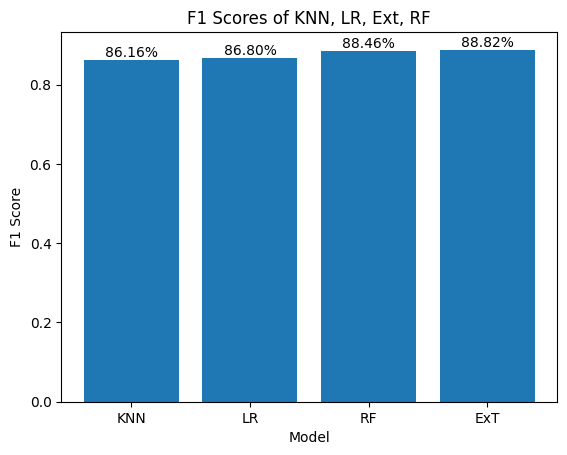

In [ ]:
lr_f1=f1_score(y_test, y_pred_lr, average='macro')
knn_f1 = f1_score(y_test, y_pred_knn, average='macro')
fig, ax = plt.subplots()
models = ['KNN', 'LR','RF','ExT']
f1_scores = [knn_f1, lr_f1, rfc_f1,etc_f1]
bars = ax.bar(models, f1_scores)


for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2%}', ha='center', va='bottom')

ax.set_xlabel('Model')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores of KNN, LR, Ext, RF')

plt.show()

[[126  12]
 [ 24 143]]


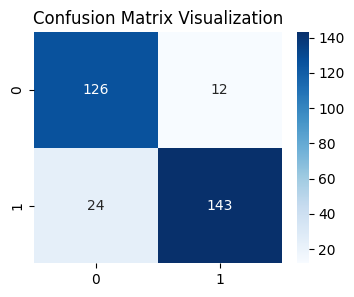

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix1=confusion_matrix(y_test,y_pred_ext)
print(cf_matrix1)
plt.figure(figsize=(4,3))
plt.title('Confusion Matrix Visualization')
sns.heatmap(cf_matrix1, annot=True, fmt='', cmap='Blues')
plt.show()

# **KNN Visualization**

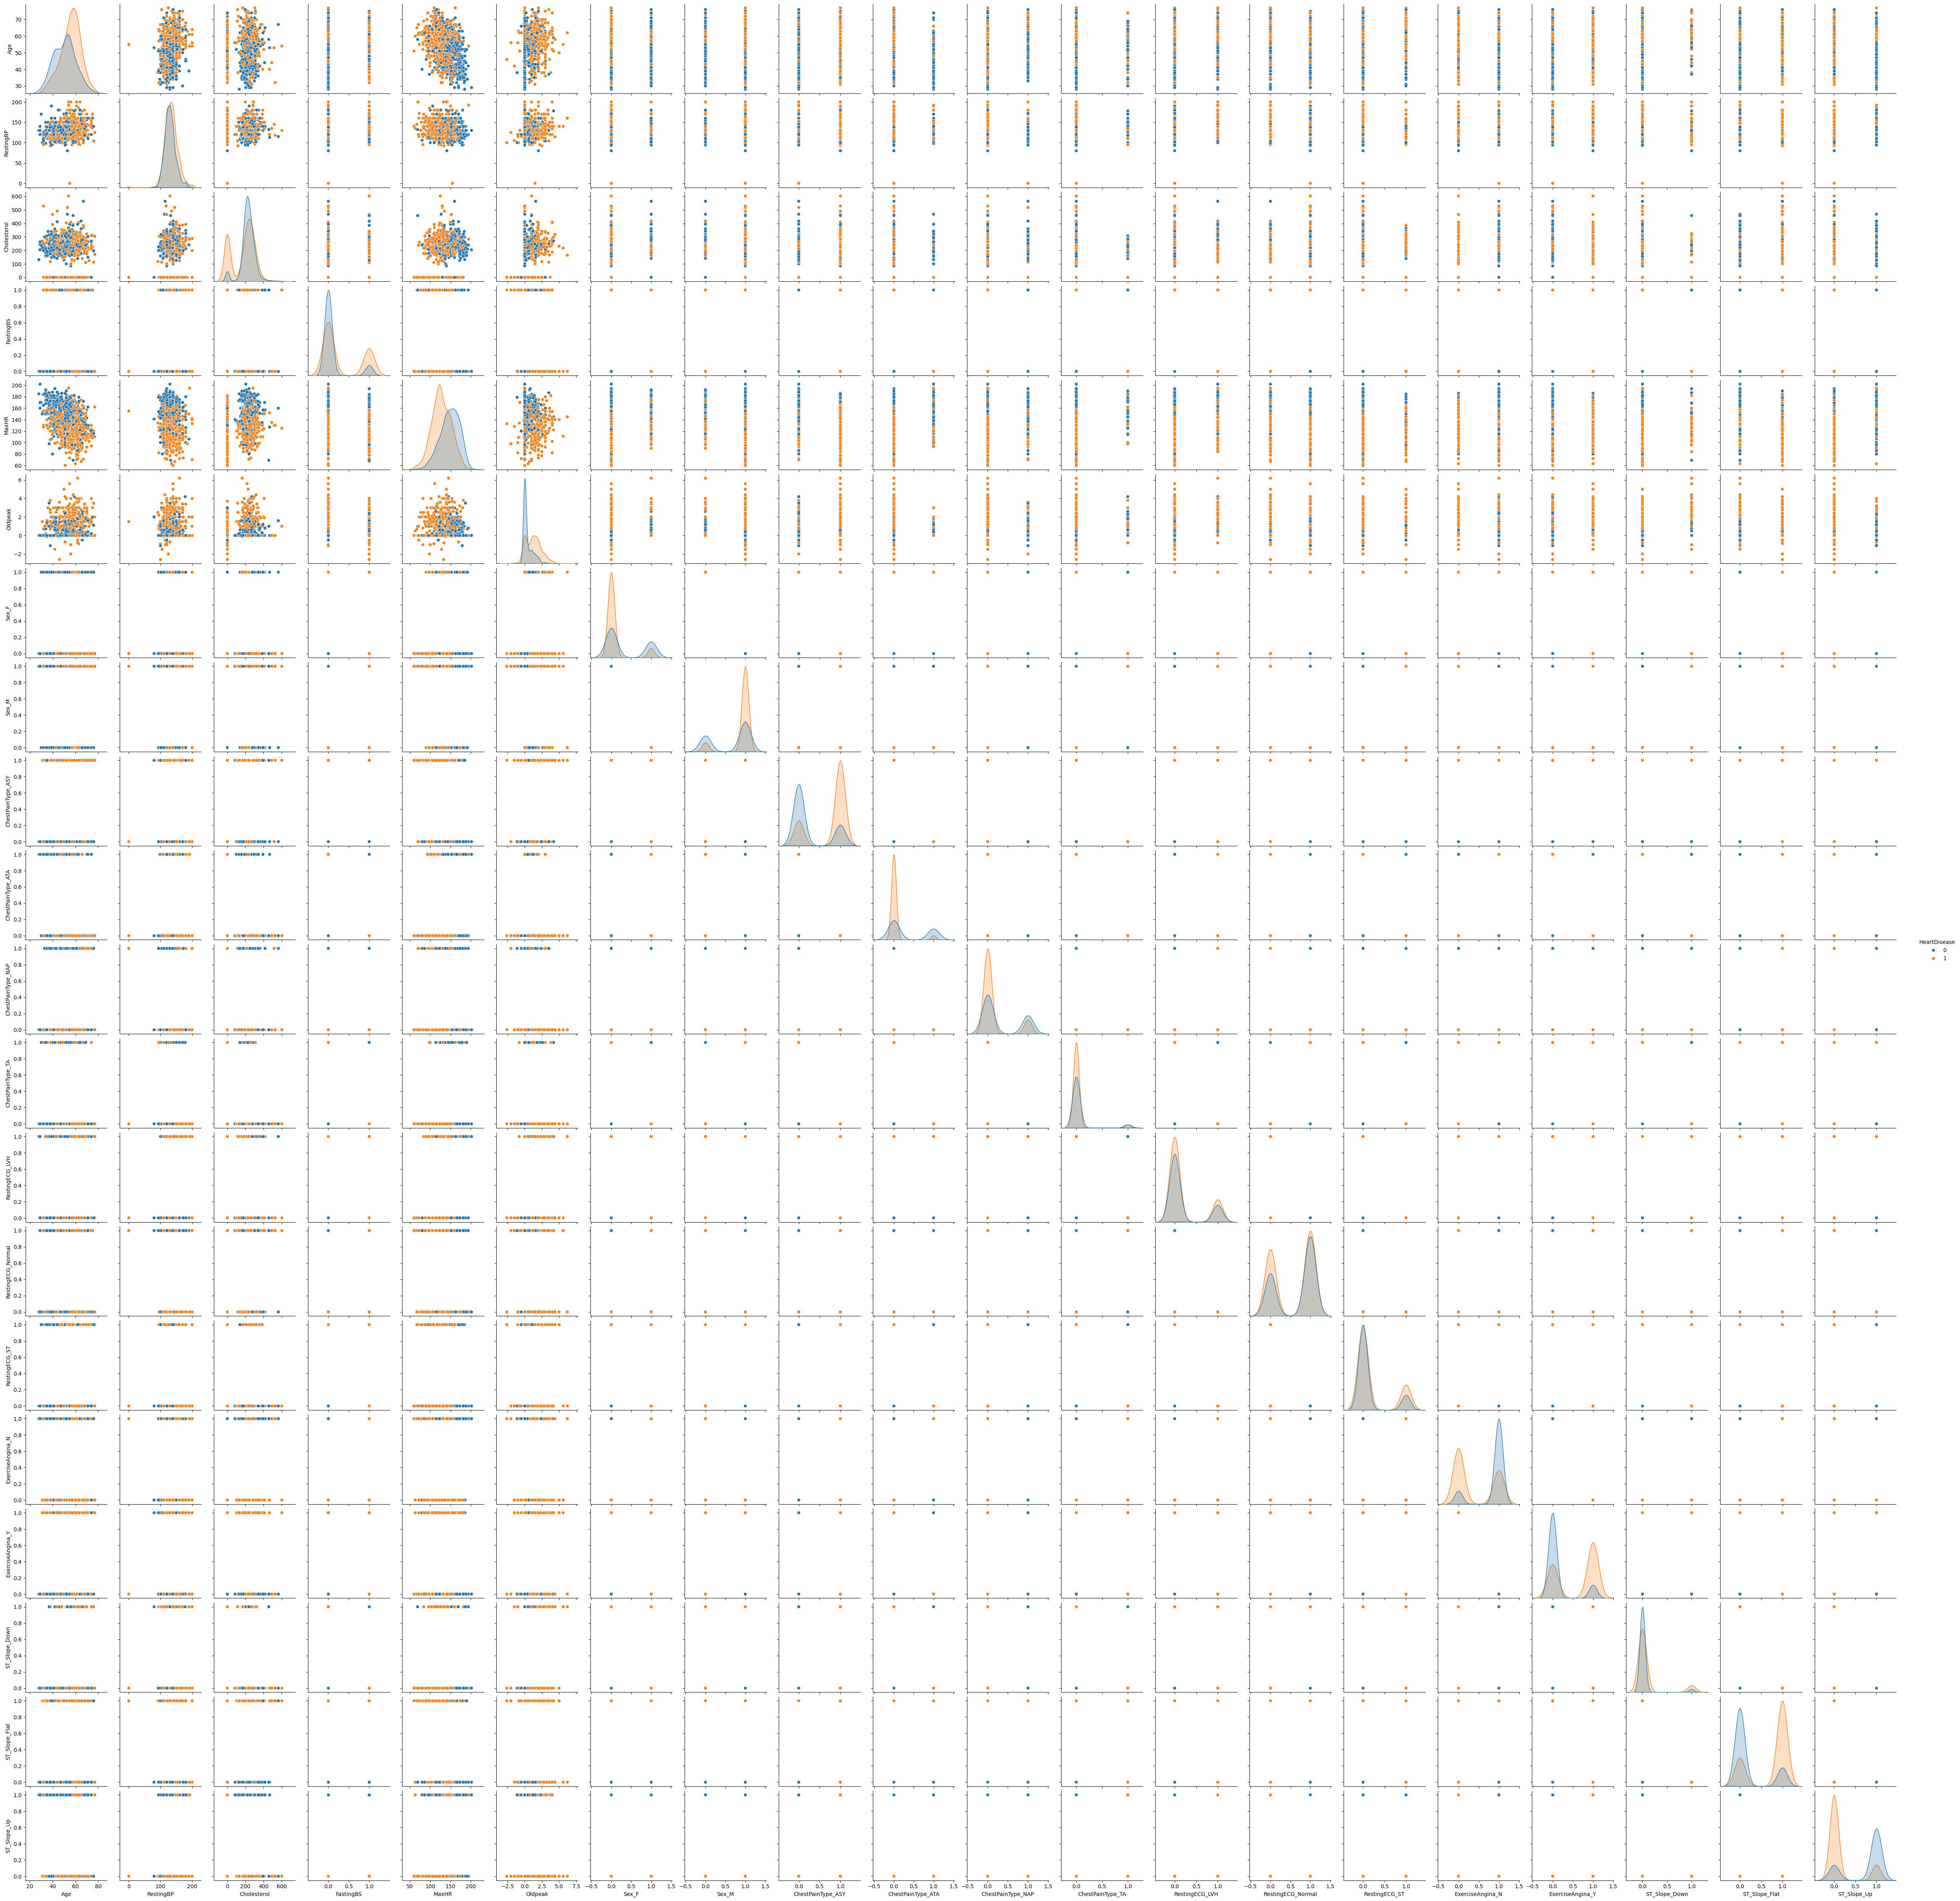

In [ ]:
sns.pairplot(data_C, hue='HeartDisease')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
def knn_comparison(data_C, k):
 x = data_C[['Age','MaxHR']].values
 y = data_C['HeartDisease'].astype(int).values
 clf = neighbors.KNeighborsClassifier(n_neighbors=k)
 clf.fit(x, y)
# Plotting decision region
 plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
 plt.xlabel('Age')
 plt.ylabel('MaxHR')
 plt.title('Knn with K='+ str(k))
 plt.show()

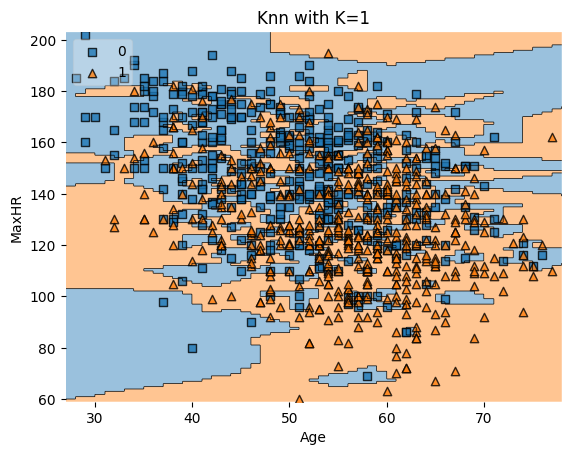

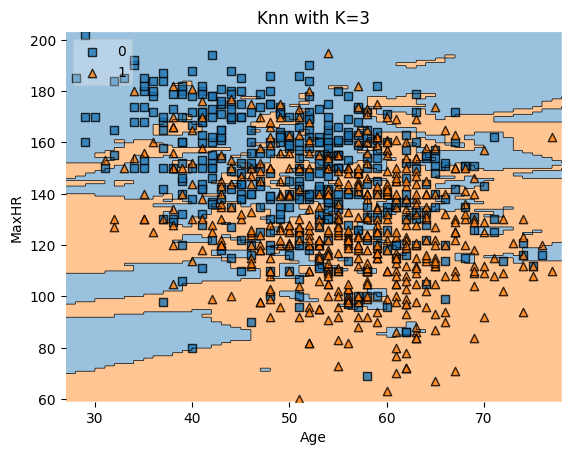

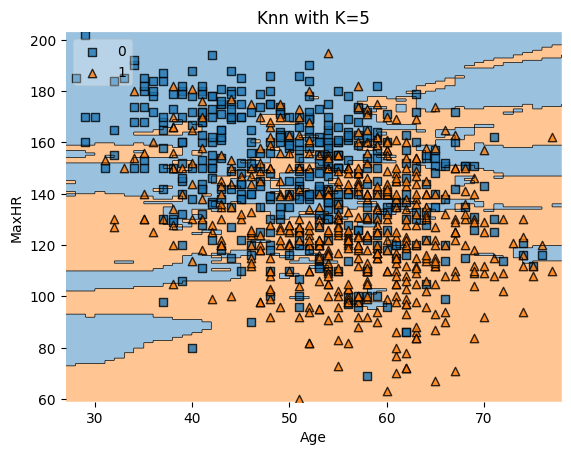

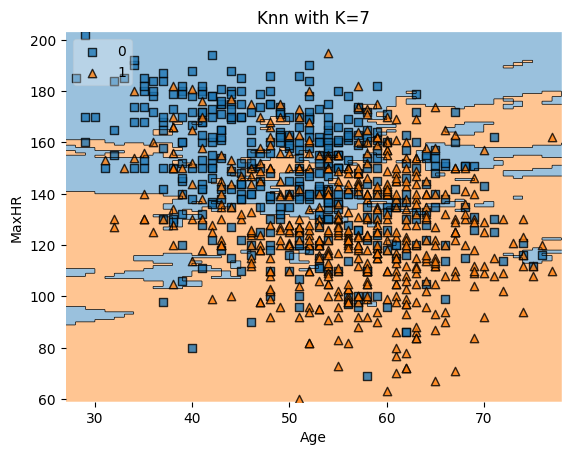

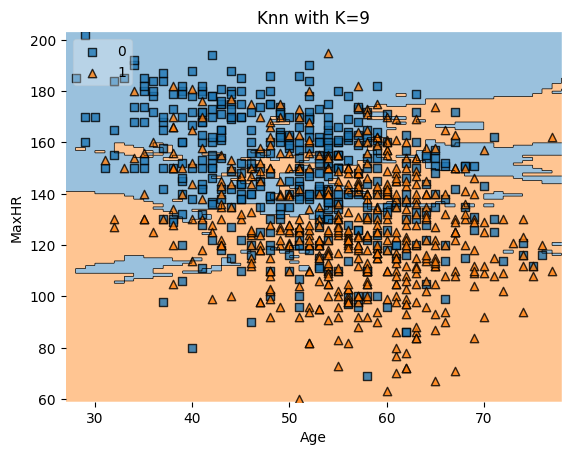

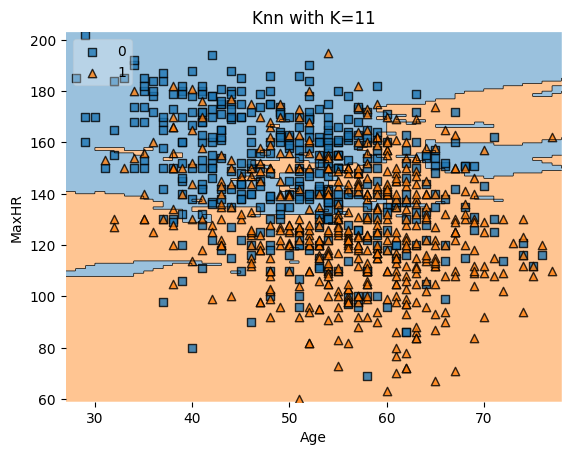

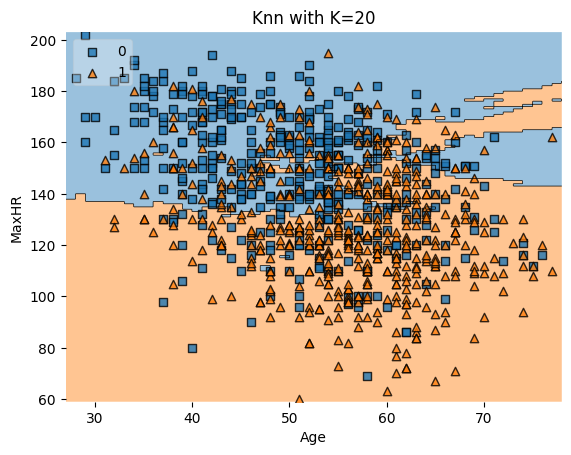

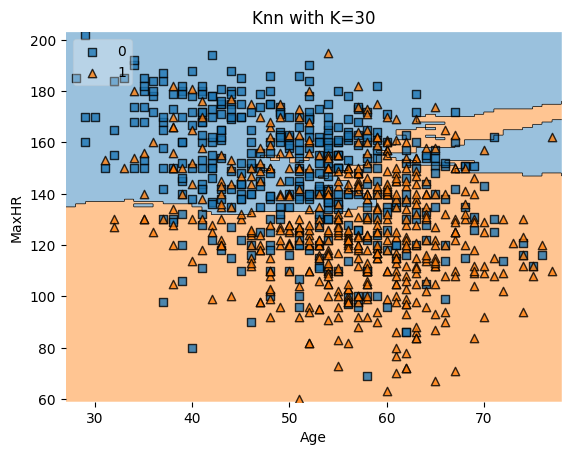

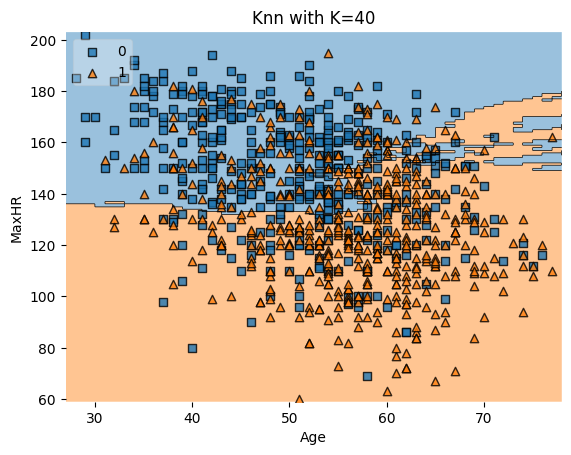

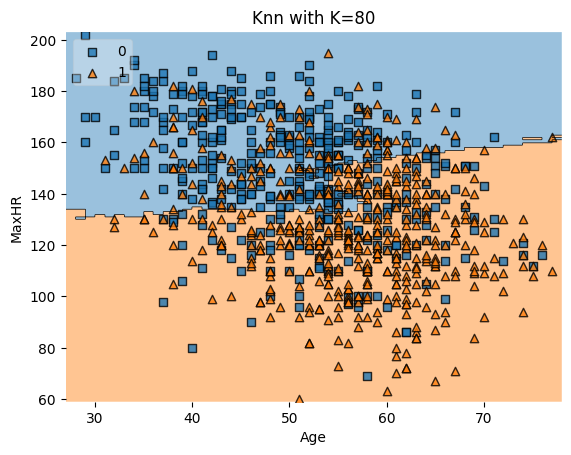

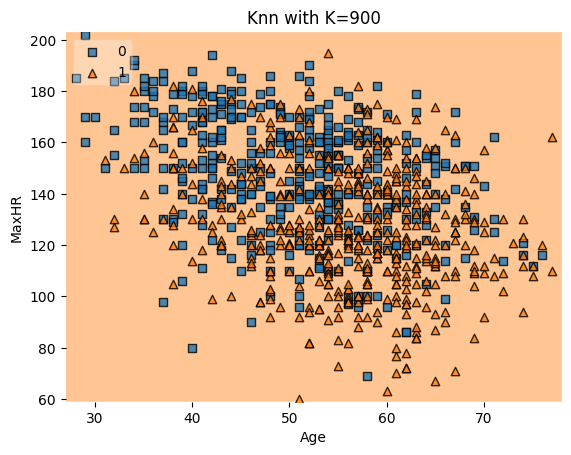

In [ ]:
for i in [1, 3, 5, 7, 9, 11, 20, 30, 40, 80, 900]:
    knn_comparison(data, i)